In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('fake_news_dataset (1).csv')
df

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,25-04-2020,InfoWars,Technology,0.91,1227,...,38880,697,Right,Mixed,0,29,10,0.22,95.46,Fake
3996,3997,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,09-01-2022,CNN,Sports,-0.57,1296,...,3650,925,Left,FALSE,1,53,3,0.42,16.54,Fake
3997,3998,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,03-03-2023,Breitbart,Entertainment,-0.17,522,...,35391,577,Left,FALSE,0,22,9,0.50,28.51,Fake
3998,3999,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,13-04-2021,New York Times,Health,-0.88,169,...,40424,201,Left,FALSE,1,3,6,0.17,71.16,Real


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

In [5]:
df["date_published"] = pd.to_datetime(df['date_published'], dayfirst=True, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4000 non-null   int64         
 1   title              4000 non-null   object        
 2   author             4000 non-null   object        
 3   text               4000 non-null   object        
 4   state              4000 non-null   object        
 5   date_published     4000 non-null   datetime64[ns]
 6   source             4000 non-null   object        
 7   category           4000 non-null   object        
 8   sentiment_score    4000 non-null   float64       
 9   word_count         4000 non-null   int64         
 10  char_count         4000 non-null   int64         
 11  has_images         4000 non-null   int64         
 12  has_videos         4000 non-null   int64         
 13  readability_score  4000 non-null   float64       
 14  num_shar

In [6]:
df[['word_count', 'clickbait_score', 'plagiarism_score']].describe()

,word_count,clickbait_score,plagiarism_score
count,4000.000000,4000.000000,4000.000000
mean,795.655750,0.494447,50.598110
std,406.373871,0.289138,28.932298
min,100.000000,0.000000,0.040000
25%,445.750000,0.240000,25.915000
50%,793.000000,0.490000,51.480000
75%,1150.000000,0.740000,75.580000
max,1500.000000,1.000000,99.950000


In [7]:
df['is_satirical'] = df['is_satirical'].astype(bool)
df['has_videos'] = df['has_videos'].astype(bool)
df['has_images'] = df['has_images'].astype(bool)
df['label_binary'] = df['label'].map({"Real":0, "Fake":1})

In [8]:
df = df.drop(columns=['id', 'char_count'])
df

,title,author,text,state,date_published,source,category,sentiment_score,word_count,has_images,...,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label,label_binary
0,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,2021-11-30,The Onion,Entertainment,-0.22,1302,False,...,450,Center,FALSE,True,76,6,0.84,53.35,Fake,1
1,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,2021-09-02,The Guardian,Technology,0.92,322,True,...,530,Left,Mixed,True,1,5,0.85,28.28,Fake,1
2,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,2021-04-13,New York Times,Sports,0.25,228,False,...,763,Center,Mixed,False,57,1,0.72,0.38,Fake,1
3,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,2020-03-08,CNN,Sports,0.94,155,True,...,945,Center,TRUE,True,18,10,0.92,32.20,Fake,1
4,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,2022-03-23,Daily Mail,Technology,-0.01,962,True,...,433,Right,Mixed,False,95,6,0.66,77.70,Real,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,2020-04-25,InfoWars,Technology,0.91,1227,True,...,697,Right,Mixed,False,29,10,0.22,95.46,Fake,1
3996,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,2022-01-09,CNN,Sports,-0.57,1296,False,...,925,Left,FALSE,True,53,3,0.42,16.54,Fake,1
3997,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,2023-03-03,Breitbart,Entertainment,-0.17,522,False,...,577,Left,FALSE,False,22,9,0.50,28.51,Fake,1
3998,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,2021-04-13,New York Times,Health,-0.88,169,True,...,201,Left,FALSE,True,3,6,0.17,71.16,Real,0


In [9]:
df["label"].value_counts()

label
Fake    2026
Real    1974
Name: count, dtype: int64

In [10]:
df["label"].value_counts(normalize=True)*100

label
Fake    50.65
Real    49.35
Name: proportion, dtype: float64

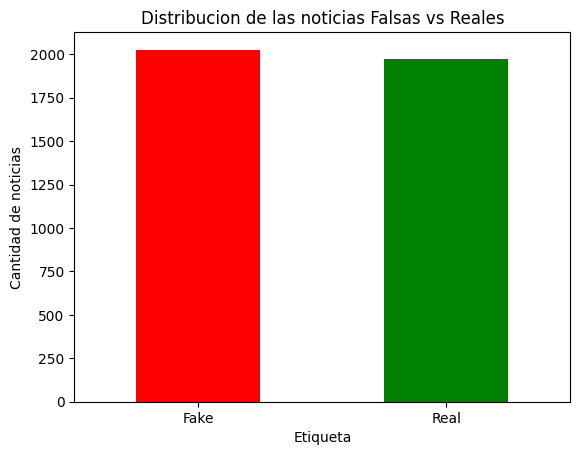

In [11]:
df["label"].value_counts().plot(kind='bar', color = ['red', 'green'])
plt.title("Distribucion de las noticias Falsas vs Reales")
plt.xlabel("Etiqueta")
plt.ylabel("Cantidad de noticias")
plt.xticks(rotation = 0)
plt.show()

In [12]:
clickbait_altas = df[df['clickbait_score']>=0.9]
clickbait_altas

,title,author,text,state,date_published,source,category,sentiment_score,word_count,has_images,...,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label,label_binary
3,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,2020-03-08,CNN,Sports,0.94,155,True,...,945,Center,TRUE,True,18,10,0.92,32.20,Fake,1
10,Breaking News 11,John Doe,This is the content of article 11. It contains...,Texas,2020-01-02,The Guardian,Business,-0.43,247,False,...,260,Right,Mixed,True,15,4,0.91,80.56,Fake,1
16,Breaking News 17,Emily Davis,This is the content of article 17. It contains...,Tennessee,2020-07-29,Daily Mail,Entertainment,-0.35,1002,False,...,207,Left,Mixed,False,1,6,0.90,59.14,Real,0
20,Breaking News 21,Emily Davis,This is the content of article 21. It contains...,Ohio,2024-01-14,CNN,Entertainment,-0.25,323,False,...,1,Left,Mixed,False,23,1,0.97,89.94,Fake,1
25,Breaking News 26,Jane Smith,This is the content of article 26. It contains...,Michigan,2020-06-25,Fox News,Sports,-0.11,143,True,...,599,Right,Mixed,True,57,1,0.99,83.17,Real,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,Breaking News 3968,Chris Lee,This is the content of article 3968. It contai...,Arizona,2021-11-19,Fox News,Politics,0.01,1293,False,...,413,Right,FALSE,False,25,4,0.99,90.05,Real,0
3969,Breaking News 3970,Alex Johnson,This is the content of article 3970. It contai...,Washington,2021-09-30,The Guardian,Technology,0.03,958,False,...,367,Right,FALSE,False,29,10,0.93,32.96,Fake,1
3973,Breaking News 3974,Jane Smith,This is the content of article 3974. It contai...,Missouri,2023-08-21,New York Times,Technology,-0.42,417,True,...,446,Right,TRUE,False,6,6,0.98,58.46,Fake,1
3978,Breaking News 3979,Jane Smith,This is the content of article 3979. It contai...,Missouri,2020-06-01,New York Times,Sports,0.80,749,True,...,784,Left,FALSE,True,96,4,0.97,26.77,Real,0


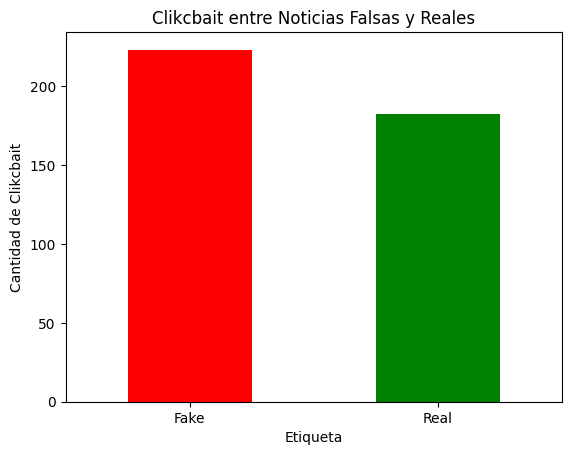

In [14]:
clickbait_altas["label"].value_counts().plot(kind='bar', color=['red','green'])
plt.title("Clikcbait entre Noticias Falsas y Reales")
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de Clikcbait')
plt.xticks(rotation = 0)
plt.show()

In [15]:
clickbait_altas['source'].value_counts().head(10)

source
CNN                40
Breitbart          39
HuffPost           38
Fox News           33
Daily Mail         32
Snopes             31
The Guardian       31
Washington Post    29
New York Times     28
InfoWars           28
Name: count, dtype: int64

In [16]:
clickbait_altas['category'].value_counts().head(10)

category
Health           76
Entertainment    76
Business         72
Politics         66
Technology       59
Sports           56
Name: count, dtype: int64

In [17]:
clickbait_altas['is_satirical'].value_counts()

is_satirical
False    208
True     197
Name: count, dtype: int64

In [18]:
clickbait_altas['plagiarism_score'].value_counts()

plagiarism_score
35.44    2
70.11    2
7.75     2
95.75    2
89.94    2
        ..
51.20    1
19.34    1
55.52    1
80.13    1
45.28    1
Name: count, Length: 393, dtype: int64

In [19]:
df['plagiarism_score'].describe()

count    4000.000000
mean       50.598110
std        28.932298
min         0.040000
25%        25.915000
50%        51.480000
75%        75.580000
max        99.950000
Name: plagiarism_score, dtype: float64

In [20]:
df.groupby('label')['plagiarism_score'].mean()

label
Fake    50.957443
Real    50.229311
Name: plagiarism_score, dtype: float64

In [25]:
df.groupby('label')[['num_shares', 'num_comments']].mean()

,num_shares,num_comments
label,,
Fake,25469.393880,490.330207
Real,24811.243668,489.398176


In [26]:
df.groupby('category')[['num_shares', 'num_comments']].mean().sort_values(by='num_shares', ascending=False)

,num_shares,num_comments
category,,
Sports,25669.857143,511.222050
Entertainment,25635.248025,478.047393
Politics,25479.816541,508.030075
Business,24859.523481,491.451657
Technology,24840.248826,469.261346
Health,24467.043165,480.778417


In [27]:
df.groupby('source')[['num_shares', 'num_comments']].mean().sort_values(by='num_shares', ascending=False)

,num_shares,num_comments
source,,
The Guardian,26612.167235,495.587031
The Onion,26159.092357,511.697452
CNN,25772.741279,484.828488
HuffPost,25500.659443,502.430341
Reuters,25277.178808,464.076159
BBC,25252.726316,502.666667
Daily Mail,25034.117264,487.136808
New York Times,24832.122507,495.464387
InfoWars,24810.305842,464.130584
